# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Data Visualization, EDA and Feature Engineering

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We import all the necessary libraries for this section;


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sets the seaborn theme
sns.set_style("ticks")

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary.


In [30]:
df = pd.read_csv("Data/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


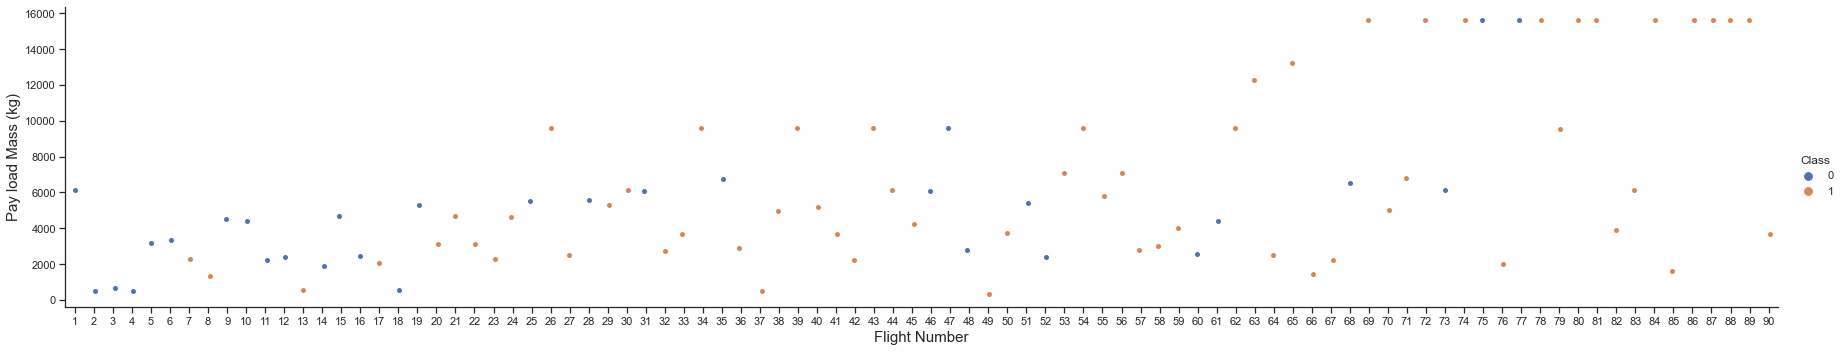

In [29]:
sns.catplot(x="FlightNumber", y="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number",fontsize=15)
plt.ylabel("Pay load Mass (kg)",fontsize=15)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site and visualize their detailed launch records.


### Relationship between Flight Number and Launch Site


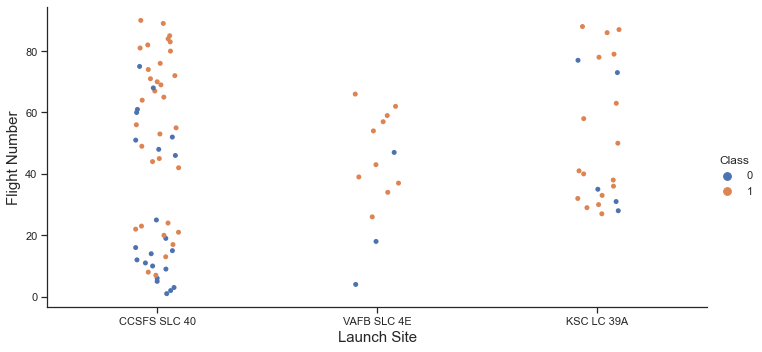

In [28]:
sns.catplot(x="LaunchSite", y="FlightNumber", hue="Class", data=df, aspect=2)
plt.xlabel("Launch Site",fontsize=15)
plt.ylabel("Flight Number",fontsize=15)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### Relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


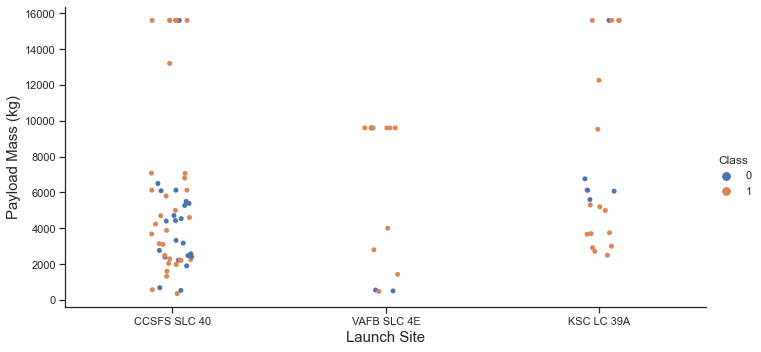

In [27]:
sns.catplot(x="LaunchSite", y="PayloadMass", hue="Class", data=df, aspect=2)
plt.xlabel("Launch Site",fontsize=15)
plt.ylabel("Payload Mass (kg)",fontsize=15)
plt.show()

Now try to explain any patterns you found in the Payload Vs. Launch Site scatter point chart.


### Relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


To do this, we create a `bar chart` for the sucess rate of each orbit.


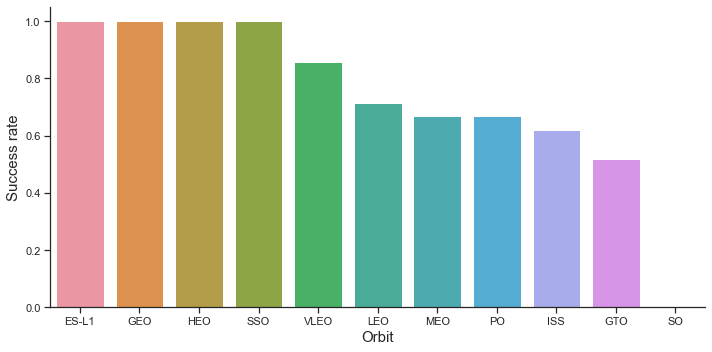

In [36]:
dft = df.groupby(['Orbit']).mean()
dft.sort_values(by=['Class'], inplace=True, ascending=False)
dft.reset_index(inplace=True)

sns.catplot(x="Orbit", y="Class", kind="bar", data=dft, aspect=2)
plt.xlabel("Orbit",fontsize=15)
plt.ylabel("Success rate",fontsize=15)
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### Relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


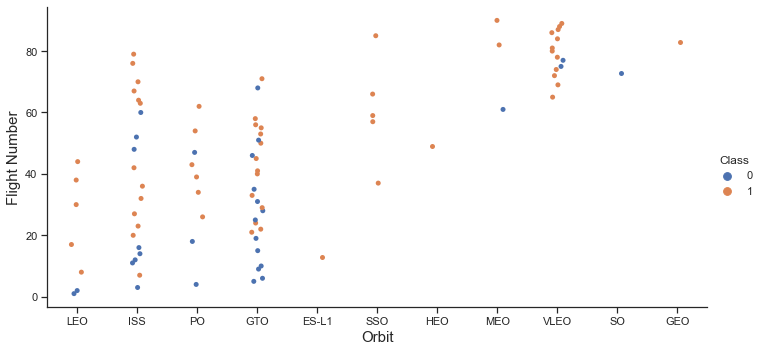

In [37]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="Orbit", y="FlightNumber", hue="Class", data=df, aspect=2)
plt.xlabel("Orbit",fontsize=15)
plt.ylabel("Flight Number",fontsize=15)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


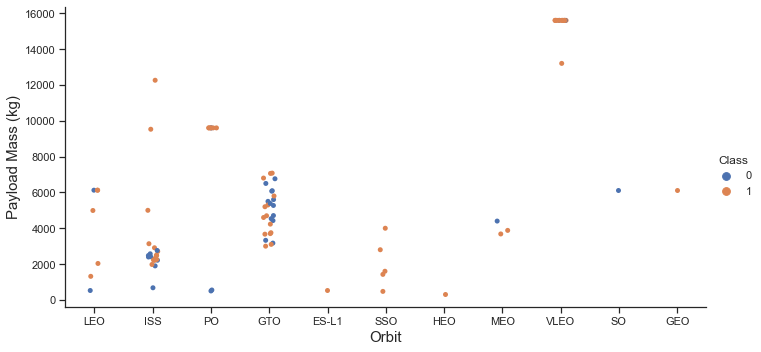

In [38]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="Orbit", y="PayloadMass", hue="Class", data=df, aspect=2)
plt.xlabel("Orbit",fontsize=15)
plt.ylabel("Payload Mass (kg)",fontsize=15)
plt.show()

You should observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.


### Launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [41]:
# A function to Extract years from the date 
year = []
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

df["Year"] = Extract_year(df["Date"])
dft = df.groupby(['Year']).mean()
dft.reset_index(inplace=True)

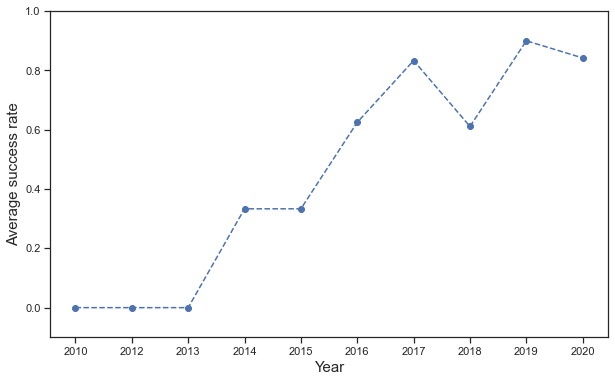

In [47]:
plt.figure(figsize=(10,6))
plt.plot( 'Year', 'Class', data=dft, linestyle='--', marker='o')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average success rate', fontsize=15)
plt.ylim([-0.1, 1])
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [48]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Creating dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [49]:
features_one_hot = pd.get_dummies(features, columns = ['Orbit','LaunchSite','LandingPad','Serial'], drop_first=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Casting all numeric columns to `float64`

Now that our <code>features_one_hot</code> dataframe only contains numbers, we cast the entire dataframe to variable type <code>float64</code>


In [60]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,9.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [61]:
features_one_hot.to_csv('Data/dataset_part_3.csv', index=False)